**Diabetes Prediction Using PyCaret**


In [1]:
!pip install pycaret

     |████████████████████████████████| 194kB 7.0MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 266kB 16.4MB/s 
     |████████████████████████████████| 389kB 21.9MB/s 
     |████████████████████████████████| 1.2MB 31.5MB/s 
     |████████████████████████████████| 63.9MB 56kB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 1.6MB 48.6MB/s 
     |████████████████████████████████| 3.2MB 46.8MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 7.0MB 39.7MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 235kB 53.1MB/s 
     |████████████████████████████████| 604kB 42.6MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 552kB 46.1MB/s 
     |████████████████████████████████| 6.3MB 47.0MB/s 
   

In [1]:
#importing libraries
from pycaret.classification import *
from pycaret.datasets import get_data

In [3]:
#loading Diabetes dataset
df = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#setting target variable
exp_clf = setup(df, target='Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1206
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
#finding best model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.758100,0.832600,0.599700,0.675000,0.633300,0.454000
1,Linear Discriminant Analysis,0.754400,0.811200,0.545900,0.697000,0.606400,0.432600
2,Ridge Classifier,0.754300,0.000000,0.535100,0.699300,0.601200,0.429000
3,CatBoost Classifier,0.752400,0.833500,0.599700,0.673300,0.628100,0.444500
4,Light Gradient Boosting Machine,0.750600,0.815600,0.599400,0.662500,0.625200,0.439700
5,Logistic Regression,0.750500,0.803300,0.539800,0.687000,0.597900,0.422000
6,Extra Trees Classifier,0.750400,0.806600,0.512900,0.692900,0.585700,0.413900
7,Gradient Boosting Classifier,0.748700,0.821500,0.567500,0.671200,0.611800,0.428300
8,Ada Boost Classifier,0.735700,0.810200,0.568100,0.633200,0.592100,0.400200
9,K Neighbors Classifier,0.733700,0.757600,0.577800,0.632600,0.598500,0.401300


In [6]:
#create the model 
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8519,0.8812,0.7368,0.8235,0.7778,0.6672
1,0.6111,0.7759,0.4211,0.4444,0.4324,0.1370
2,0.7407,0.8316,0.5789,0.6471,0.6111,0.4176
3,0.7778,0.8602,0.6842,0.6842,0.6842,0.5128
4,0.7407,0.8256,0.5263,0.6667,0.5882,0.4028
5,0.7593,0.8541,0.5263,0.7143,0.6061,0.4384
6,0.7407,0.8090,0.5789,0.6471,0.6111,0.4176
7,0.7925,0.8127,0.6667,0.7059,0.6857,0.5310
8,0.7547,0.8222,0.6667,0.6316,0.6486,0.4605
9,0.8113,0.8540,0.6111,0.7857,0.6875,0.5554


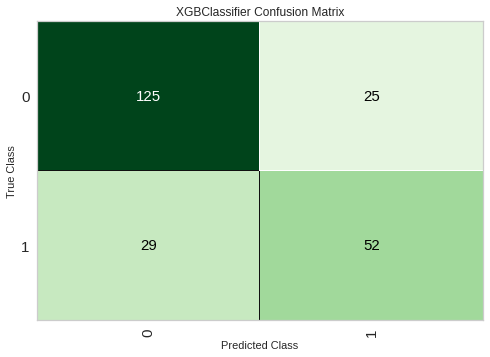

In [11]:
##visualization Confusion Matrix
plot_model(xgb, 'confusion_matrix')

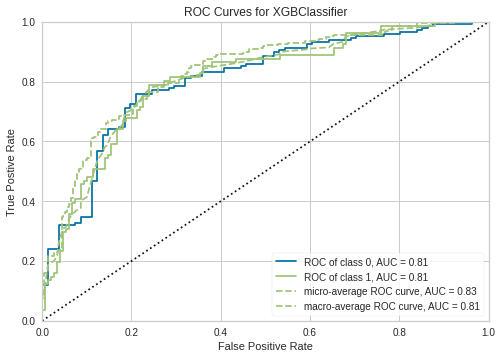

In [10]:
#visualization 
#buy default pycaret make a ROC curve
plot_model(xgb)

**Predictions**

In [12]:
#In pycaret we dont need to do train test split manually by 70% of training and 30% of testing 
predictions = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7662,0.8077,0.642,0.6753,0.6582,0.4808


**Saving the Model**

In [13]:
finalize_model(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1206,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [14]:
#saving the model in pkl file
save_model(xgb, 'diabetes_xgb')

Transformation Pipeline and Model Succesfully Saved
